#**Getting Started**

###Import the Pandas library.

In [ ]:
import pandas as pd

###Load the test_data.csv file from Lecture 1 as a Pandas DataFrame named "df".

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Mangul-Lab-USC/biomedical_data_science/master/workshop_materials/test_data.csv')

###This DataFrame has five miscellaneous columns (column0 - column4) and one column for sample names (sample_name). 

In [ ]:
df

,column0,column1,column2,column3,column4,sample_name
0,control,yes,0.25,0.10,0.00,sample1
1,case,yes,0.90,0.25,0.75,sample2
2,control,yes,0.43,0.23,0.02,sample3
3,case,no,0.84,0.34,0.90,sample4


###However, since we want to understand our data (column0 - column4) relative to each sample, reload the data with the sample_name column as the index column. 

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Mangul-Lab-USC/biomedical_data_science/master/workshop_materials/test_data.csv', index_col='sample_name')
df

,column0,column1,column2,column3,column4
sample_name,,,,,
sample1,control,yes,0.25,0.10,0.00
sample2,case,yes,0.90,0.25,0.75
sample3,control,yes,0.43,0.23,0.02
sample4,case,no,0.84,0.34,0.90


###Now our data appears to contain two columns of strings and three columns of numbers. Confirm this as follows.
Notice that here strings are labeled 'object' and the numbers are labeled 'float64'. If our data contained integers, they would be labled as 'int64'.

In [ ]:
df.dtypes

column0     object
column1     object
column2    float64
column3    float64
column4    float64
dtype: object

#**DataFrame Manipulation with Pandas**

##**Selecting Data**

###Select an arbritrary column.

In [ ]:
df['column2']

sample_name
sample1    0.25
sample2    0.90
sample3    0.43
sample4    0.84
Name: column2, dtype: float64

###Select multiple columns using a Python List.
Notice how indexing df with a list produces different output than indexing it with a string. 

In [ ]:
columnsOfInterest=['column0','column1','column4']
df[columnsOfInterest]

,column0,column1,column4
sample_name,,,
sample1,control,yes,0.00
sample2,case,yes,0.75
sample3,control,yes,0.02
sample4,case,no,0.90


###Select the first five rows from the start of a DataFrame.
Note that because this DataFrame contains less than five rows, calling head() outputs the entire DataFrame. As such, it is useful for viewing the column names of large tabular records.

In [ ]:
df.head()

,column0,column1,column2,column3,column4
sample_name,,,,,
sample1,control,yes,0.25,0.10,0.00
sample2,case,yes,0.90,0.25,0.75
sample3,control,yes,0.43,0.23,0.02
sample4,case,no,0.84,0.34,0.90


###Select a specified number of rows from the start of a DataFrame.

In [ ]:
df.head(2)

,column0,column1,column2,column3,column4
sample_name,,,,,
sample1,control,yes,0.25,0.10,0.00
sample2,case,yes,0.90,0.25,0.75


###Select rows that match specific criteria.
Notice that we use the "==" syntax here to denote "is equal to" instead of "=".

In [ ]:
df.loc[df['column0'] == 'control']

,column0,column1,column2,column3,column4
sample_name,,,,,
sample1,control,yes,0.25,0.10,0.00
sample3,control,yes,0.43,0.23,0.02


Python also supports other comparison operators such as >, <, >=, <=, and != ("not equal to").

In [ ]:
df.loc[df['column4'] > 0]

,column0,column1,column2,column3,column4
sample_name,,,,,
sample2,case,yes,0.90,0.25,0.75
sample3,control,yes,0.43,0.23,0.02
sample4,case,no,0.84,0.34,0.90


###Select rows that match multiple criteria.

In [ ]:
df.loc[(df['column0'] == 'control') & (df['column4'] > 0)]

,column0,column1,column2,column3,column4
sample_name,,,,,
sample3,control,yes,0.43,0.23,0.02


##**Creating New Columns**

###Create a new column from existing number-containing columns.
Note this is done by indexing df with a column the does not yet exist.

In [1]:
df['column24'] = df['column2'] + df['column4']
df

NameError: ignored

If the column already exists, the data in that column will be overwritten.

In [ ]:
df['column24'] = 42
df

###Create a new column from existing string-containing columns.
Notice how we added an underscore to the output by including the string "___" in our concatenation.

In [ ]:
df['column01']  = df['column0'] + "___" + df['column1']
df

###If you accidentally try to add strings and numbers together, you will receive the following error:

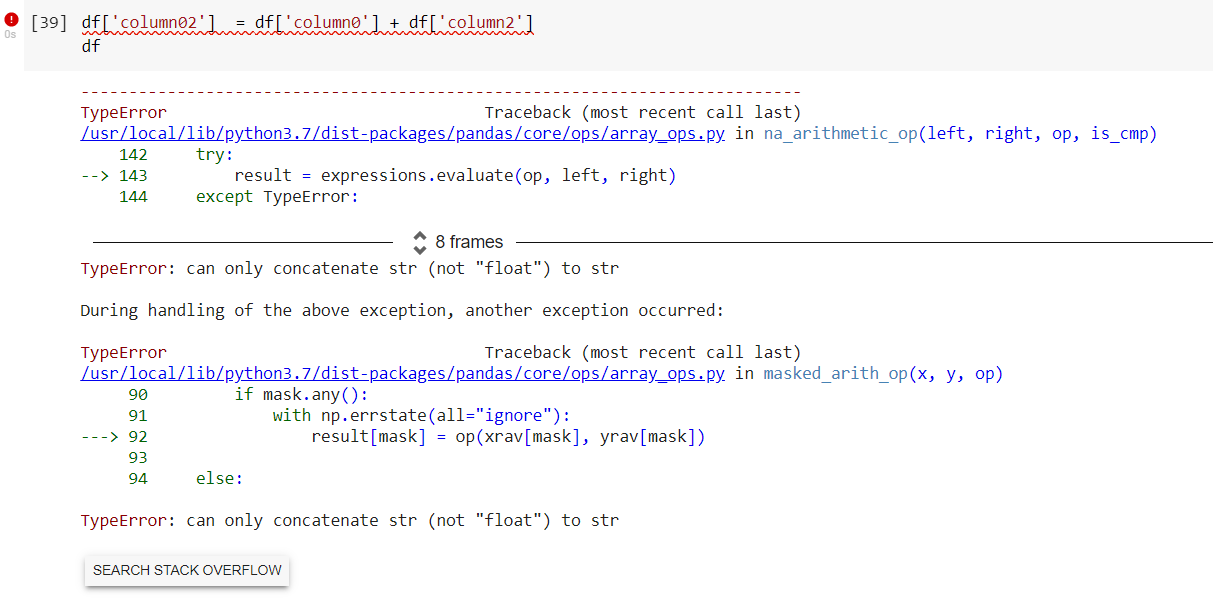

###Create a new column based on a condition.
Additionally, rows which did not meet the critera were not given a value so they defaulted to NaN. 

In [ ]:
df.loc[df['column0'] == 'control', 'new_column0'] = 10
df

###Create a new column based on multiple conditions.

In [ ]:
df.loc[(df['column0'] == 'control') & (df['column4'] > 0), 'new_column04'] = "greaterThanZero"
df

##**Cleaning Data of NaNs**

###Load a version of the previous data containing a typo. 
Notice the error in column2 for sample4.

In [ ]:
dfWithTypo=pd.read_csv('https://raw.githubusercontent.com/Mangul-Lab-USC/biomedical_data_science/master/workshop_materials/test_data_test.csv', index_col='sample_name')
dfWithTypo

,column0,column1,column2,column3,column4
sample_name,,,,,
sample1,control,yes,0.25,0.10,0.00
sample2,case,yes,0.9,0.25,0.75
sample3,control,yes,0.43,0.23,0.02
sample4,case,no,c084,0.34,0.90


###Check the impact of the typo on column2.
Note that if this typo were at the end of a much larger DataFrame, we might not have caught it without calling dtypes. 

In [ ]:
dfWithTypo.dtypes

column0     object
column1     object
column2     object
column3    float64
column4    float64
dtype: object

###Convert all typos in column2 into a NaN value.

In [ ]:
dfWithTypo['column2'] = pd.to_numeric(dfWithTypo['column2'], errors='coerce')
dfWithTypo

,column0,column1,column2,column3,column4
sample_name,,,,,
sample1,control,yes,0.25,0.10,0.00
sample2,case,yes,0.90,0.25,0.75
sample3,control,yes,0.43,0.23,0.02
sample4,case,no,NaN,0.34,0.90


You can confirm that the invalid value was succesfully converted into an NaN by using isnull().

###Display whether the values in column2 are NaNs.
Note that for a much larger DataFrame, you can add '*.sum()*' to count NaNs. 

In [ ]:
dfWithTypo['column2'].isnull()

sample_name
sample1    False
sample2    False
sample3    False
sample4     True
Name: column2, dtype: bool

###Remove all rows that contain any NaN values.

In [ ]:
dfWithTypoRemoved=dfWithTypo.dropna(how='any')
dfWithTypoRemoved

,column0,column1,column2,column3,column4
sample_name,,,,,
sample1,control,yes,0.25,0.10,0.00
sample2,case,yes,0.90,0.25,0.75
sample3,control,yes,0.43,0.23,0.02


###Alternatively, replace NaN values with a specific value.

In [ ]:
dfWithTypoReplaced=dfWithTypo.fillna(0)
dfWithTypoReplaced

,column0,column1,column2,column3,column4
sample_name,,,,,
sample1,control,yes,0.25,0.10,0.00
sample2,case,yes,0.90,0.25,0.75
sample3,control,yes,0.43,0.23,0.02
sample4,case,no,0.00,0.34,0.90


However, if you want to permit some NaN values, you may do so in the following ways.

###Append an empty row to the previous DataFrame for example's sake.
Note: You do not need to know this command for this lab since it is used here for example purposes only.

In [ ]:
dfWithAddedNaNs=df.append(pd.Series(name='sample5', dtype='object'))
dfWithAddedNaNs

,column0,column1,column2,column3,column4,column24,column01,new_column0,new_column04
sample_name,,,,,,,,,
sample1,control,yes,0.25,0.10,0.00,42.0,control___yes,10.0,NaN
sample2,case,yes,0.90,0.25,0.75,42.0,case___yes,NaN,NaN
sample3,control,yes,0.43,0.23,0.02,42.0,control___yes,10.0,greaterThanZero
sample4,case,no,0.84,0.34,0.90,42.0,case___no,NaN,NaN
sample5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###Remove rows entirely made up of NaNs.

In [ ]:
dfWithAddedNaNs.dropna(how='all')

,column0,column1,column2,column3,column4,column24,column01,new_column0,new_column04
sample_name,,,,,,,,,
sample1,control,yes,0.25,0.10,0.00,42.0,control___yes,10.0,NaN
sample2,case,yes,0.90,0.25,0.75,42.0,case___yes,NaN,NaN
sample3,control,yes,0.43,0.23,0.02,42.0,control___yes,10.0,greaterThanZero
sample4,case,no,0.84,0.34,0.90,42.0,case___no,NaN,NaN


###Remove rows containing NaN in new_column0

In [ ]:
dfWithAddedNaNs.dropna(subset=['new_column0'])

,column0,column1,column2,column3,column4,column24,column01,new_column0,new_column04
sample_name,,,,,,,,,
sample1,control,yes,0.25,0.10,0.00,42.0,control___yes,10.0,NaN
sample3,control,yes,0.43,0.23,0.02,42.0,control___yes,10.0,greaterThanZero


##**Merging Multiple DataFrames**

###Reload the first DataFrame to remove the changes made in previous code blocks.

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Mangul-Lab-USC/biomedical_data_science/master/workshop_materials/test_data.csv', index_col='sample_name')
df

,column0,column1,column2,column3,column4
sample_name,,,,,
sample1,control,yes,0.25,0.10,0.00
sample2,case,yes,0.90,0.25,0.75
sample3,control,yes,0.43,0.23,0.02
sample4,case,no,0.84,0.34,0.90


###Load a second DataFrame.

In [ ]:
df2=pd.read_csv('https://raw.githubusercontent.com/Mangul-Lab-USC/biomedical_data_science/master/workshop_materials/test_data2.csv', index_col='sample_name')
df2

,age
sample_name,
sample1,25
sample4,33
sample3,55


###Merge two DataFrames based on a specific column.
Notice that sample2 was removed. This is because by default (how='inner'), Pandas merges DataFrames based on row identifiers that only appear in both DataFrames. In this case, sample2 was only in df. 

In [ ]:
df1And2=df.merge(df2,on='sample_name')
df1And2

,column0,column1,column2,column3,column4,age
sample_name,,,,,,
sample1,control,yes,0.25,0.10,0.00,25
sample3,control,yes,0.43,0.23,0.02,55
sample4,case,no,0.84,0.34,0.90,33


###Alternatively, merge two DataFrames based on row identifiers that appear in the left DataFrame.
Notice that sample2 is now included again. Merging via the 'right' DataFrame instead would remove sample2 once more.

In [ ]:
df1And2MergedLeft=df.merge(df2,on='sample_name',how='left')
df1And2MergedLeft

,column0,column1,column2,column3,column4,age
sample_name,,,,,,
sample1,control,yes,0.25,0.10,0.00,25.0
sample2,case,yes,0.90,0.25,0.75,NaN
sample3,control,yes,0.43,0.23,0.02,55.0
sample4,case,no,0.84,0.34,0.90,33.0


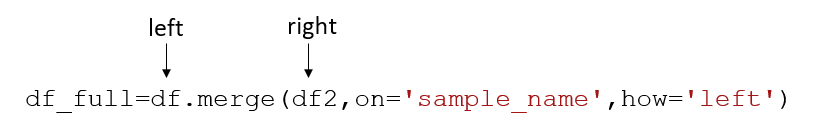

###Alternatively, merge two DataFrames including all row identifiers from both DataFrames.
Here, we added an empty row to df2 and saved it under the name df2Altered. Even though the empty row was not present in df, it was still included because we merged based on the unison of both DataFrames.

In [ ]:
df2Altered=df2.append(pd.Series(name='sample5',dtype='object'))
df1And2AlteredMerged=df.merge(df2Altered,on='sample_name',how='outer')
df1And2AlteredMerged

,column0,column1,column2,column3,column4,age
sample_name,,,,,,
sample1,control,yes,0.25,0.10,0.00,25.0
sample2,case,yes,0.90,0.25,0.75,NaN
sample3,control,yes,0.43,0.23,0.02,55.0
sample4,case,no,0.84,0.34,0.90,33.0
sample5,NaN,NaN,NaN,NaN,NaN,NaN


###Load a third DataFrame.
Note that this third DataFrame has a column1 just like df.

In [ ]:
df3=pd.read_csv('https://raw.githubusercontent.com/Mangul-Lab-USC/biomedical_data_science/master/workshop_materials/test_data3.csv', index_col='sample_name')
df3

,age,column1
sample_name,,
sample1,25,yes
sample4,33,no
sample3,55,yes


###Merge two DataFrames that contain multiple columns with the same name.
Notice that instead of choosing df or df3's version of column1, both were saved and automatically renamed. 

In [ ]:
df_full4=df.merge(df3,on='sample_name')
df_full4

,column0,column1_x,column2,column3,column4,age,column1_y
sample_name,,,,,,,
sample1,control,yes,0.25,0.10,0.00,25,yes
sample3,control,yes,0.43,0.23,0.02,55,yes
sample4,case,no,0.84,0.34,0.90,33,no


###Merge two DataFrames based on multiple columns.

In [ ]:
df_full5=df.merge(df3,on=['sample_name','column1'])
df_full5

,column0,column1,column2,column3,column4,age
sample_name,,,,,,
sample1,control,yes,0.25,0.10,0.00,25
sample3,control,yes,0.43,0.23,0.02,55
sample4,case,no,0.84,0.34,0.90,33


##**Grouping Rows**

###Group rows based on a single column.
Notice how the *sample_name* column was removed because Pandas could not generate the mean of multiple names.

You can also group rows by sum using sum() instead of mean().

In [ ]:
df1And2_groupedByCol0=df1And2.groupby('column0').mean()
df1And2_groupedByCol0

,column2,column3,column4,age
column0,,,,
case,0.84,0.340,0.90,33
control,0.34,0.165,0.01,40


###Group rows based on multiple columns.

In [ ]:
df1And2_groupedByCol0AndAge=df1And2.groupby(['column0','age']).mean()
df1And2_groupedByCol0AndAge

column2  column3  column4
column0 age                           
case    33      0.84     0.34     0.90
control 25      0.25     0.10     0.00
        55      0.43     0.23     0.02

Notice how both of the above examples set new index columns, rendering those columns inaccessible. To perform futher manipulations on those columns, you will need to reset the DataFrame's index columns.

###Reset a DataFrame's index column.

In [ ]:
df1And2_groupedByCol0=df1And2_groupedByCol0.reset_index()
df1And2_groupedByCol0


,column0,column2,column3,column4,age
0,case,0.84,0.340,0.90,33
1,control,0.34,0.165,0.01,40


Afterwards, you can set a new index column should you so choose.

###Set a new index column for a DataFrame.

In [ ]:
df1And2_groupedByCol0=df1And2_groupedByCol0.set_index('age')
df1And2_groupedByCol0

,column0,column2,column3,column4
age,,,,
33,case,0.84,0.340,0.90
40,control,0.34,0.165,0.01


##**Saving Your Data**

###Save the following DataFrame into your Google Drive.
Note that running this command will overwrite files of the same name if they already exists.

In [ ]:
df.to_csv('/content/test_data.csv')

#**Lab 4 Assignment: Data Preparation with Pandas**

##**Instructions**

In your own Google Colab, use the commands presented in the previous sections to perform the following DataFrame manipulations using the a datset published by the New York City Department of Parks and Recreation (CC0 1.0 Universal Public Domain Dedication). You will be graded based on whether your Colab notebook can produce .csv file from the DataFrame at the end of this assignment.As such, please submit both your Google Colab notebook and the .csv file it produced.

To start, you may **import this dataset with the command below:**

In [ ]:
lab1_df=pd.read_csv('https://data.cityofnewyork.us/api/views/5rq2-4hqu/rows.csv?accessType=DOWNLOAD')

Notice how it takes a while to load the file as a Pandas DataFrame. This is because the file is 225 MB. At this size, it would be quite cumbersome trying to edit this within Microsoft Excel. But with Pandas, things will run much smoother. 

This data itself comes from *TreesCount! 2015*, a large scale citizen science initiative in which paritcipants gathered census data for trees in New York City. Their results were compiled into the *2015 Street Tree Census* ([Link](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/pi5s-9p35) ) which later informed community development and local policy, improving the lives of the people of New York City. 






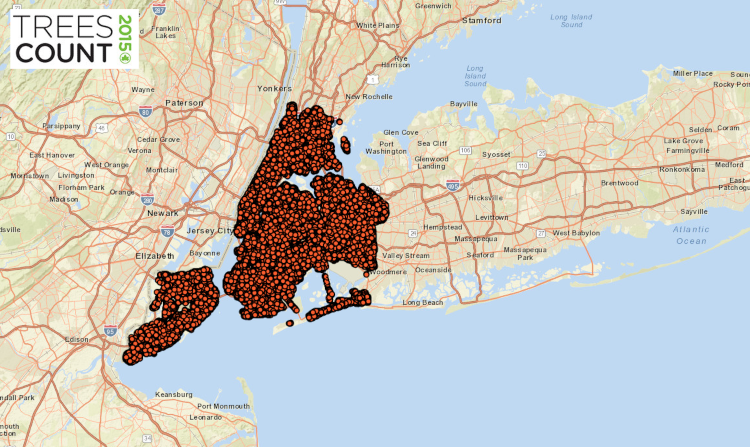

After obtaining a new dataset, it is important get a sense for what information it contains. We can start by using head() to view just the beginning of the file.

In [ ]:
lab1_df.head()

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trnk_wire,trnk_light,trnk_other,brnch_ligh,brnch_shoe,brnch_othe,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,Latitude,longitude,x_sp,y_sp
0,08/27/2015,180683,348711,POINT (-73.84421521958048 40.723091773924274),3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.768749
1,09/03/2015,200540,315986,POINT (-73.81867945834878 40.79411066708779),21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.837379
2,09/05/2015,204026,218365,POINT (-73.93660770459083 40.717580740099116),3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.891267
3,09/05/2015,204337,217969,POINT (-73.93445615919741 40.713537494833226),10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.253136
4,08/30/2015,189565,223043,POINT (-73.97597938483258 40.66677775537875),21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.425999


Of note, there are columns for each tree's scientific name ('*spc_latin*'), common name ('*spc_common*'), '*status*' (values being 'Alive', 'Dead', or 'Stump'), '*health*', and diameter ('*tree_dbh*' for intact trees & '*stump_diam*' for stumps). 

As these are the columns we will be focusing on for this assignment, start by creating a new reduced DataFrame containing only these columns. 

To start, **create a Python list containing the name of the columns of interest. Then, create a new DataFrame called '*lab1_df_reduced*' that only contains those columns.** If successful, calling its name should produce this output:

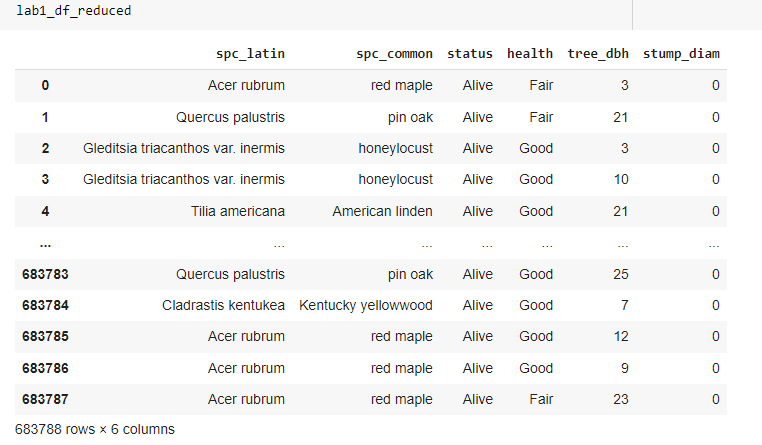

Note that this DataFrame has 683,788 rows. This will become important later.

Next, we will want to scan our new DataFrame for NaN values that may hinder later analyses. To do so, run the following code:

In [ ]:
nullValue_counts=lab1_df_reduced.isnull().sum()
nullValue_counts

Based on this, we can see that there are 31,619 NaN values in the DataFrame's '*health*' and name-related columns. Let's investigate futher by trying to figure out why that is. 

We'll do so by selecting the rows that have NaNs from our reduced DataFrame with the next command. 

( Note that below, '|' means "or" )

In [ ]:
NaNsOnly=lab1_df_reduced.loc[(lab1_df_reduced['spc_latin'].isnull() ) | (lab1_df_reduced['spc_common'].isnull() ) | (lab1_df_reduced['health'].isnull() ) ]
NaNsOnly.head()

What stands out the most from this new DataFrame is that the status of the first five rows have changed from '*Alive*' to *'Dead'* and *'Stump'*. Based on this, it is starting to seem like there were issues identifying the species and health of dead trees and stumps. 

It also seems unlikely that the '*status*' column changed by chance since otherwise that'd suggest New York City could be largely filled with dead trees and stumps. 

Let's run one more command so we can gather more evidence to access whether identification issues were the source of our NaNs. 

In [ ]:
pd.value_counts(NaNsOnly['status'])

Based on this evidence, it is now safe to assume that our reduced DataFrame's NaNs are mostly not random mistakes but instead due to trouble identifying physically obscured trees. 

Assuming this, we can now decide how we want to deal with the NaN values as we explore different questions about the census. 

Let's obtain the mean diameter for every tree, including those which were dead and/or unidentified.  

When calculating the mean here, we should be warry of columns for which no diameter information was recorded as including them in our calculations will render them incorrect. 

Running the following command, we can see that 278 of such rows exist. 

In [ ]:
lab1_df_reduced.loc[(lab1_df_reduced['tree_dbh'] == 0) & (lab1_df_reduced['stump_diam'] == 0)]

As such, **filter out these rows and save the new DataFrame under the name '_lab1_df_reduced_zerosFiltered_'.** By using the command below, you can confirm the this filtered DataFrame is exactly 278 rows shorter than before.

In [ ]:
len(lab1_df_reduced_zerosFiltered)

Next, peform the following steps:

**1) Group the rows of the filtered DataFrame by the columns '_status_', '_spc_latin_', '_spc_common_', and '_health_'.** 

**2) Add 'dropna=False' as an argument to groupby().**

**3) Use mean() to get the mean tree diameter for each group.**

**4) Save this as a DataFrame named 'lab1_df_reduced_zerosFiltered_grouped'**

*Hint*: If you save the column names as a list, this will take two lines of code. If not, it will take up a single line.

---

Calling the name of this new DataFrame should output the following:

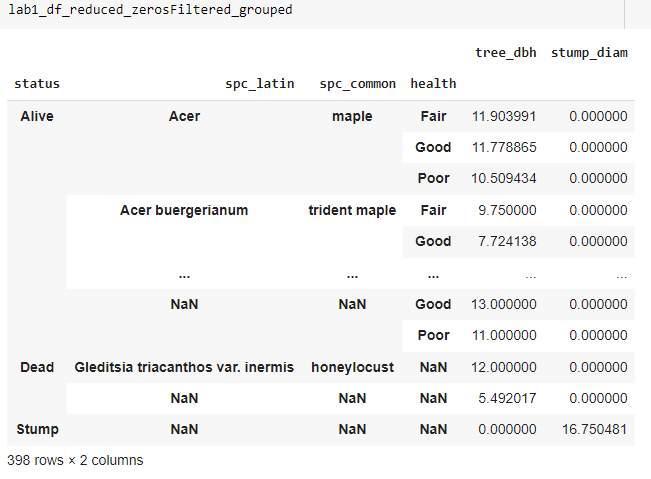

While we've come quite far from our original DataFrame, we still want to modify this one. **To get the DataFrame ready for that, reset its index columns.** 

Afterwards, calling the name of the DataFrame should show this:

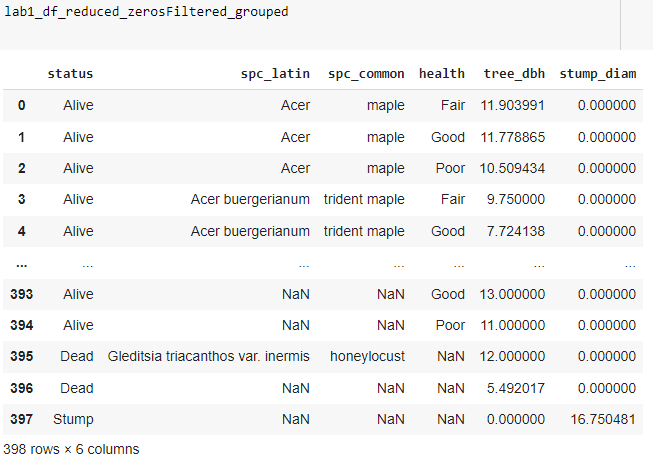

Our next step will be to **create a new column called '*diameter*' that combines the 'tree_dbh' and 'stump_diam' columns.** Since all rows have a non-zero value in one column but not both, it will be safe to sum the two columns. 

Calling the DataFrame's name again should output the following:

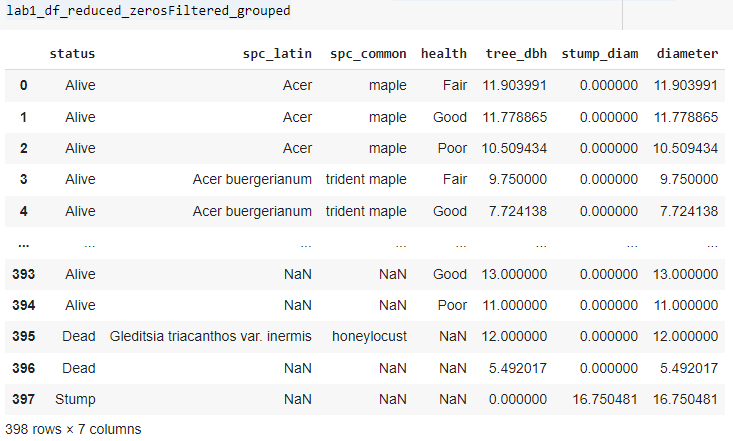

After this, **run the following command to remove the '*tree_dbh*' and '*stump_diam*' columns:**

In [ ]:
lab1_df_reduced_zerosFiltered_grouped.drop(columns=['tree_dbh', 'stump_diam'], inplace=True)
lab1_df_reduced_zerosFiltered_grouped

Our final modification to this DataFrame will be to add counts for each row. To start, **assign each row in the reduced but ungrouped DataFrame ('*lab1_df_reduced*') with a count of 1 using the code below:**

In [ ]:
lab1_df_reduced_counts=lab1_df_reduced.assign(count = 1)
lab1_df_reduced_counts.head()

Next, perform the following steps on the *'lab1_df_reduced_counts'* DataFrame to produce the image below:

**1) Group the rows of the filtered DataFrame by the columns '_status_', '_spc_latin_', '_spc_common_', and '_health_'.** 

**2) Add 'dropna=False' as an argument to groupby().**

**3) Use sum() to add up the counts for each group.**

**4) Save this as a DataFrame named 'lab1_df_reduced_counts_grouped'**

*Hint*: As before, this code will take up two lines if you use a list. 

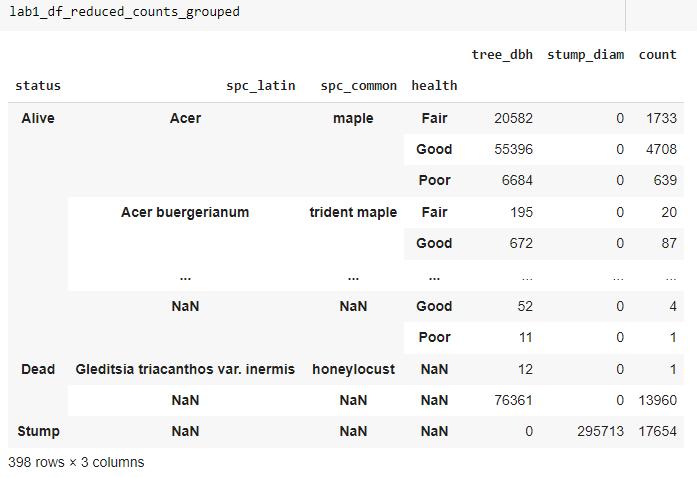

With the '*count*' column set up, the heavy-lifting has been done. To clean up, **remove the unecessary columns and reset this DataFrame's index with this code here:**

In [ ]:
lab1_df_reduced_counts_grouped.drop(columns=['tree_dbh','stump_diam'], inplace=True)
lab1_df_reduced_counts_grouped=lab1_df_reduced_counts_grouped.reset_index()
lab1_df_reduced_counts_grouped.head()

As the last modfication to our data, **produce the final dataframe named '*lab1_df_final*' by left-merging* (_outer='left'_) the two DataFrames '*lab1_df_reduced_counts_grouped*' and '*lab1_df_reduced_zerosFiltered_grouped*', in that order from left to right.** 

*( Here we chose to left-merge because the right DataFrame might be missing some rows in a niche situation, removing trees from our dataset. Merging by union would also work. )



After calling its name, the final DataFrame should appear as follows:

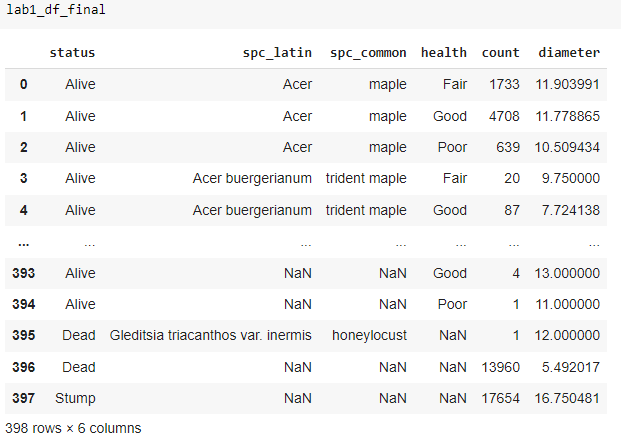

If you'd like, you can make it look a bit nicer in the notebook by running this:

In [ ]:
lab1_df_final=lab1_df_final.set_index(['status','spc_latin','spc_common','health'])
lab1_df_final

Finally, **save the final DataFrame as a .csv file and submit it alongside your Google Colab notebook for grading.**

Congratulations! You've produced the final DataFrame that would now be ready to plot! And while we won't be going that far with this dataset, if you ever visit New York City, it's possible that you'll encounter some of the trees you worked with today.

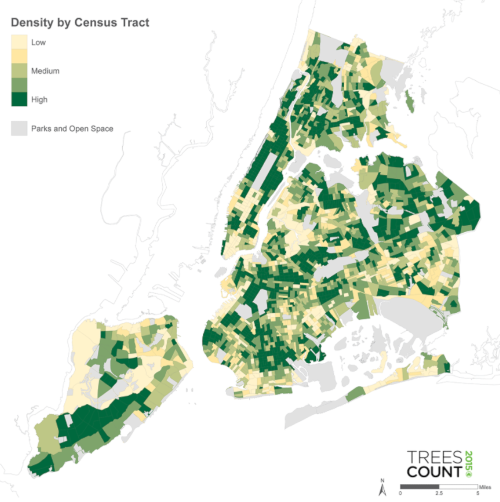